# 🖥️ Cuaderno para la creación del dataset del modelo

El objetivo principal de este cuaderno es crear el dataset que utilizará nuestro modelo, de forma que, al recibir la imagen de un componente, pueda identificar correctamente qué tipo de componente es.



## Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

Estos datos fueron obtenidos mediante técnicas de web scraping en otros cuadernos Jupyter, y posteriormente recopilados para su análisis en este proyecto.

### Fuentes:

[pc componentes](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pccomponentes/productos_pccomponentes.csv)

[techpowerup](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/techpowerup/productos_cpu.csv)
<!--
[cases pcpartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/cases_pspartpicker.csv)

[cpu cooler pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/cpu_cooler_pspartpicker.csv)

[cpu pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/cpu_pspartpicker.csv)

[gpu pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/gpu_pspartpicker.csv)

[monitor pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/monitor_pspartpicker.csv)

[motherboard pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/motherboard_pspartpicker.csv)

[os pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/os_pspartpicker.csv)

[psu pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/psu_pspartpicker.csv)

[ram pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/ram_pspartpicker.csv)

[storage pspartpicker](https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/storage_pspartpicker.csv) -->

In [2]:
df_pccomponentes = pd.read_csv("https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pccomponentes/productos_pccomponentes.csv")

In [3]:
df_techpowerup = pd.read_csv("https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/techpowerup/productos_cpu.csv")

In [4]:
# df_cases_pcpartpicker = pd.read_csv("https://raw.githubusercontent.com/Latency-Zero-tfm/HardVisionAI/refs/heads/main/data/raw/pcpartpicker/csv/cases_pspartpicker.csv")

## Descripción de los datos

![pc componentes](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSl83mVntFb7c9i0-UaL-ndNZDZDevPJMraIg&s)

### PC Componentes

Este dataset contiene **9.055 registros**. Disponemos del **tipo de componente**, que será el *target* de nuestro modelo inicial, así como del **nombre** y el **precio**, que no utilizaremos en esta fase pero resultarán útiles en etapas posteriores del proyecto.

Por último, contamos con la **URL de la imagen**, que será la principal fuente de datos para entrenar el modelo.


In [5]:
df_pccomponentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   component_type  9055 non-null   object 
 1   name            9055 non-null   object 
 2   price           8648 non-null   float64
 3   image_url       9055 non-null   object 
dtypes: float64(1), object(3)
memory usage: 283.1+ KB


In [6]:
df_pccomponentes

,component_type,name,price,image_url
0,placas-base,MSI B550M PRO-VDH,87.99,https://thumb.pccomponentes.com/w-530-530/arti...
1,placas-base,MSI B850 GAMING PLUS WIFI,209.26,https://thumb.pccomponentes.com/w-530-530/arti...
2,placas-base,Gigabyte B760M DS3H DDR4,92.99,https://thumb.pccomponentes.com/w-530-530/arti...
3,placas-base,Placa Base MSI MAG B850 Tomahawk Wifi AM5 DDR5...,234.99,https://thumb.pccomponentes.com/w-530-530/arti...
4,placas-base,ASUS PRIME B550M-A/CSM,87.99,https://thumb.pccomponentes.com/w-530-530/arti...
...,...,...,...,...
9050,tarjetas-sonido?page=2,Tarjeta de sonido DeLock 67071 USB-C aluminio ...,40.99,https://thumb.pccomponentes.com/w-530-530/arti...
9051,tarjetas-sonido?page=2,Tarjeta de sonido KeepOut HXADAP 7.1 USB con e...,18.90,https://thumb.pccomponentes.com/w-530-530/arti...
9052,tarjetas-sonido?page=2,Tarjeta de sonido Nedis USCR10051BU 5.1 canale...,14.99,https://thumb.pccomponentes.com/w-530-530/arti...
9053,tarjetas-sonido?page=2,Tarjeta de sonido Speed Link SL-8850-BK-01 USB...,11.32,https://thumb.pccomponentes.com/w-530-530/arti...


#### Valores nulos
En este subapartado vamos a analizar cuántos valores nulos existen y en qué variables se encuentran, para poder realizar una limpieza de datos más efectiva.

In [7]:
print("-" * 50)
df_pccomponentes.info()
print("-" * 50)
print(df_pccomponentes.isnull().sum())
print("-" * 50)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   component_type  9055 non-null   object 
 1   name            9055 non-null   object 
 2   price           8648 non-null   float64
 3   image_url       9055 non-null   object 
dtypes: float64(1), object(3)
memory usage: 283.1+ KB
--------------------------------------------------
component_type      0
name                0
price             407
image_url           0
dtype: int64
--------------------------------------------------


Podemos observar que los únicos valores nulos se encuentran en la columna `price`, y dado que esta columna no es relevante para el dataset que vamos a construir, su presencia no afecta al proceso.

#### Verificación del tipo de datos de `component_type`

Aquí revisaremos el **tipo de datos** de la columna `component_type` para asegurarnos de que esté en el formato adecuado para el entrenamiento del modelo.

In [8]:
df_pccomponentes["component_type"].unique()

array(['placas-base', 'placas-base?page=2', 'placas-base?page=3',
       'placas-base?page=4', 'placas-base?page=5', 'placas-base?page=6',
       'placas-base?page=7', 'placas-base?page=8', 'placas-base?page=9',
       'placas-base?page=10', 'placas-base?page=11',
       'placas-base?page=12', 'placas-base?page=13',
       'placas-base?page=14', 'placas-base?page=15',
       'placas-base?page=16', 'placas-base?page=17',
       'placas-base?page=18', 'placas-base?page=19', 'tarjetas-graficas',
       'tarjetas-graficas?page=2', 'tarjetas-graficas?page=3',
       'tarjetas-graficas?page=4', 'tarjetas-graficas?page=5',
       'tarjetas-graficas?page=6', 'tarjetas-graficas?page=7',
       'tarjetas-graficas?page=8', 'tarjetas-graficas?page=9',
       'tarjetas-graficas?page=10', 'tarjetas-graficas?page=11',
       'tarjetas-graficas?page=12', 'tarjetas-graficas?page=13',
       'tarjetas-graficas?page=14', 'procesadores', 'procesadores?page=2',
       'procesadores?page=3', 'procesadores?p

Podemos observar que será necesario normalizar los nombres de los componentes para mantener un estándar consistente en el dataset.

![Techpowerup](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGil8G9FDmK_uxP_S7LgnB7b-KeXQFnNYwWw&s)

### Techpowerup

Este dataset contiene **127 registros**. Incluye la URL del producto, el nombre y la URL de la imagen. Para este modelo únicamente utilizaremos la **imagen del producto**, y todos los elementos del dataset corresponden a **procesadores**.

In [9]:
df_techpowerup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         127 non-null    object
 1   Name        127 non-null    object
 2   Chip Image  127 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [10]:
df_techpowerup

,URL,Name,Chip Image
0,https://www.techpowerup.com/cpu-specs/core-ult...,Intel Core Ultra 9 386H,https://tpucdn.com/cpu-specs/images/chips/4305...
1,https://www.techpowerup.com/cpu-specs/core-ult...,Intel Core Ultra 7 366H,https://tpucdn.com/cpu-specs/images/chips/4306...
2,https://www.techpowerup.com/cpu-specs/core-ult...,Intel Core Ultra 7 356H,https://tpucdn.com/cpu-specs/images/chips/4307...
3,https://www.techpowerup.com/cpu-specs/core-ult...,Intel Core Ultra 5 336H,https://tpucdn.com/cpu-specs/images/chips/4309...
4,https://www.techpowerup.com/cpu-specs/ryzen-ai...,AMD Ryzen AI Max+ 388,https://tpucdn.com/cpu-specs/images/chips/4312...
...,...,...,...
122,https://www.techpowerup.com/cpu-specs/core-i9-...,Intel Core i9-9900K,https://tpucdn.com/cpu-specs/images/chips/2098...
123,https://www.techpowerup.com/cpu-specs/ryzen-5-...,AMD Ryzen 5 3550H,https://tpucdn.com/cpu-specs/images/connectivi...
124,https://www.techpowerup.com/cpu-specs/ryzen-5-...,AMD Ryzen 5 5500X3D,https://tpucdn.com/cpu-specs/images/connectivi...
125,https://www.techpowerup.com/cpu-specs/ryzen-3-...,AMD Ryzen 3 4300U,https://tpucdn.com/cpu-specs/images/chips/2286...


#### Valores nulos
En este subapartado vamos a analizar cuántos valores nulos existen y en qué variables se encuentran, para poder realizar una limpieza de datos más efectiva.

In [11]:
print("-" * 50)
df_techpowerup.info()
print("-" * 50)
print(df_techpowerup.isnull().sum())
print("-" * 50)

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         127 non-null    object
 1   Name        127 non-null    object
 2   Chip Image  127 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB
--------------------------------------------------
URL           0
Name          0
Chip Image    0
dtype: int64
--------------------------------------------------


Podemos observar que no existen valores nulos en este dataset.

## Preparación de los datos

En este apartado vamos a limpiar el dataset para dejarlo listo para el modelo.

### `component_type`

Vamos a **unificar y estandarizar los nombres** de los componentes en la columna `component_type` para mantener consistencia y facilitar el entrenamiento del modelo.

Posteriormente, **renombraremos esta columna a `label`**, que será nuestro *target* final.



In [12]:
df_pccomponentes['component_type'] = df_pccomponentes['component_type'].str.replace(r'\?page=\d+', '', regex=True)
df_pccomponentes['component_type'].unique()

array(['placas-base', 'tarjetas-graficas', 'procesadores', 'discos-duros',
       'memorias-ram', 'cajas-pc', 'fuentes-alimentacion',
       'refrigeracion-liquida', 'ventiladores-suplementarios',
       'ventiladores-cpu', 'tarjetas-sonido'], dtype=object)

### Mapeo de etiquetas a inglés

Para estandarizar y facilitar el uso del dataset, **mapearemos los nombres de los componentes del español al inglés** de la siguiente manera:

| Español                     | Inglés         |
| --------------------------- | -------------- |
| placas-base                 | motherboard    |
| tarjetas-graficas           | gpu            |
| procesadores                | cpu            |
| discos-duros                | hard_drive     |
| memorias-ram                | ram            |
| cajas-pc                    | pc_case        |
| fuentes-alimentacion        | power_supply   |
| refrigeracion-liquida       | liquid_cooling |
| ventiladores-suplementarios | case_fan       |
| ventiladores-cpu            | cpu_fan        |
| tarjetas-sonido             | sound_card     |



In [13]:
mapping = {
    'placas-base': 'motherboard',
    'tarjetas-graficas': 'gpu',
    'procesadores': 'cpu',
    'discos-duros': 'hard_drive',
    'memorias-ram': 'ram',
    'cajas-pc': 'pc_case',
    'fuentes-alimentacion': 'power_supply',
    'refrigeracion-liquida': 'liquid_cooling',
    'ventiladores-suplementarios': 'case_fan',
    'ventiladores-cpu': 'cpu_fan',
    'tarjetas-sonido': 'sound_card'
}

df_pccomponentes['component_type'] = df_pccomponentes['component_type'].str.replace(r'\?page=\d+', '', regex=True)
df_pccomponentes['component_type'] = df_pccomponentes['component_type'].map(mapping)

### Renombrar la columna a `label`

In [14]:
df_pccomponentes = df_pccomponentes.rename(columns={'component_type': 'label'})
print(df_pccomponentes['label'].unique())

['motherboard' 'gpu' 'cpu' 'hard_drive' 'ram' 'pc_case' 'power_supply'
 'liquid_cooling' 'case_fan' 'cpu_fan' 'sound_card']


### Creación de la columna `label` en el dataset de CPUs

En el dataset de CPUs, vamos a crear una columna **`label`** que servirá como *target* para el modelo.

In [15]:
df_techpowerup['label'] = 'cpu'
df_techpowerup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         127 non-null    object
 1   Name        127 non-null    object
 2   Chip Image  127 non-null    object
 3   label       127 non-null    object
dtypes: object(4)
memory usage: 4.1+ KB


### Renombrar la columna de imagen

Para mantener consistencia en todos los datasets, vamos a cambiar el nombre de la columna que contiene la URL de la imagen a `image_url`.

In [16]:
df_techpowerup = df_techpowerup.rename(columns={'Chip Image': 'image_url'})

### Filtrado de columnas relevantes

En este paso vamos a **conservar únicamente las columnas necesarias** para nuestro modelo, descartando el resto de información que no utilizaremos por ahora.

In [17]:
df_pccomponentes = df_pccomponentes[["image_url", "label"]]
df_pccomponentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_url  9055 non-null   object
 1   label      9055 non-null   object
dtypes: object(2)
memory usage: 141.6+ KB


In [18]:
df_techpowerup = df_techpowerup[["image_url", "label"]]
df_techpowerup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_url  127 non-null    object
 1   label      127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


### Creación del DataFrame

En este primer paso vamos a construir el **DataFrame** que contendrá toda la información necesaria para nuestro dataset.

In [19]:
df = pd.concat([df_pccomponentes, df_techpowerup], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_url  9182 non-null   object
 1   label      9182 non-null   object
dtypes: object(2)
memory usage: 143.6+ KB


In [20]:
df

,image_url,label
0,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
1,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
2,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
3,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
4,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
...,...,...
9177,https://tpucdn.com/cpu-specs/images/chips/2098...,cpu
9178,https://tpucdn.com/cpu-specs/images/connectivi...,cpu
9179,https://tpucdn.com/cpu-specs/images/connectivi...,cpu
9180,https://tpucdn.com/cpu-specs/images/chips/2286...,cpu


El dataset final contiene `9.182` registros, cada uno con la URL de la imagen de un componente de PC y su correspondiente etiqueta (label) que indica el tipo de componente.

## Guardamos el dataset

A continuación guardamos el dataset final en un archivo CSV para poder usarlo en otros cuadernos o descargarlo a nuestra máquina:

In [21]:
# df.to_csv('components_01.csv', index=False)
# df.to_json('components_01.json', orient='records')

In [22]:
# from google.colab import files

# # Descargar a tu máquina local
# files.download('components_01.csv')
# files.download('components_01.json')


## Visualización de los datos

Las siguientes gráficas muestran la cantidad y proporción de imágenes por tipo de componente, ofreciendo una visión clara de la distribución del dataset.

In [23]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_url  9182 non-null   object
 1   label      9182 non-null   object
dtypes: object(2)
memory usage: 143.6+ KB


,image_url,label
0,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
1,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
2,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
3,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
4,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
...,...,...
9177,https://tpucdn.com/cpu-specs/images/chips/2098...,cpu
9178,https://tpucdn.com/cpu-specs/images/connectivi...,cpu
9179,https://tpucdn.com/cpu-specs/images/connectivi...,cpu
9180,https://tpucdn.com/cpu-specs/images/chips/2286...,cpu


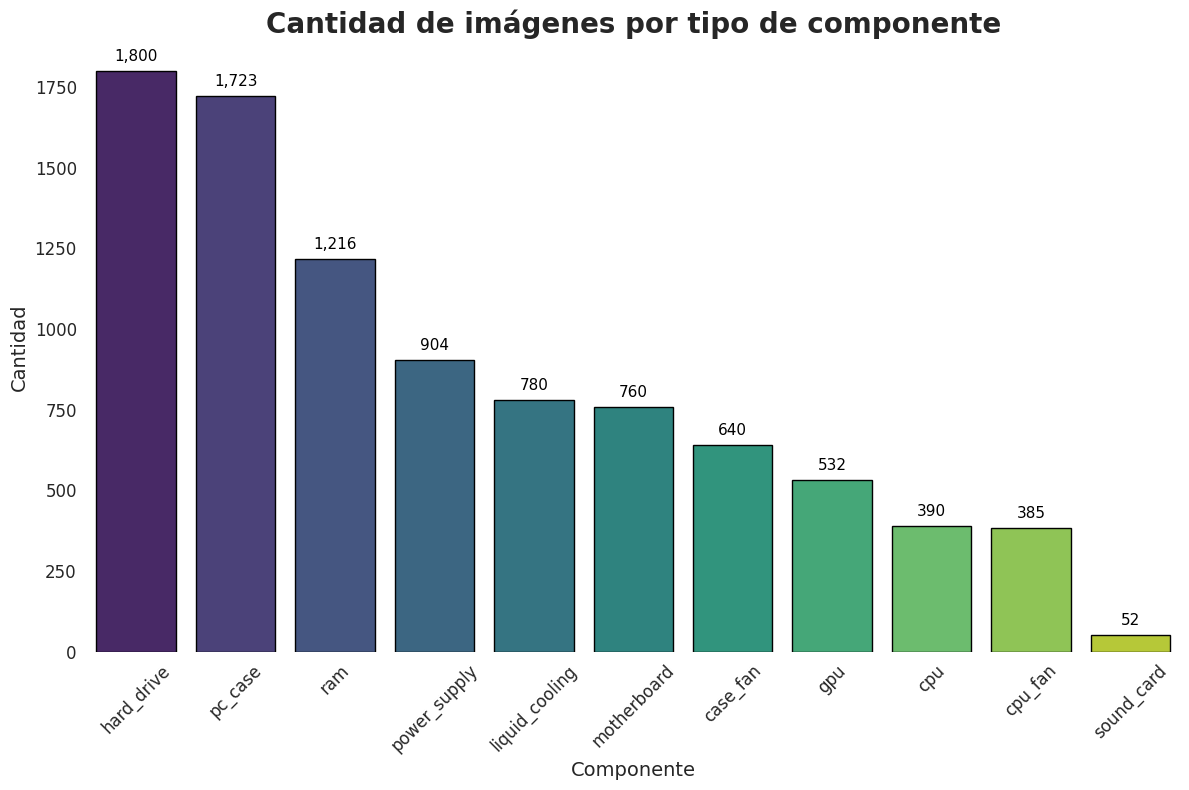

In [42]:
label_counts = df["label"].value_counts().reset_index()
label_counts.columns = ["label", "count"]

sns.set_style("white")

plt.figure(figsize=(12,8))
barplot = sns.barplot(
    x="label",
    y="count",
    data=label_counts,
    palette="viridis",
    edgecolor="black",
    hue="label"
)

for patch in barplot.patches:
    height = patch.get_height()
    barplot.annotate(
        f"{int(height):,}",
        (patch.get_x() + patch.get_width() / 2, height),
        ha="center",
        va="bottom",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points"
    )

plt.title("Cantidad de imágenes por tipo de componente", fontsize=20, weight="bold")
plt.xlabel("Componente", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

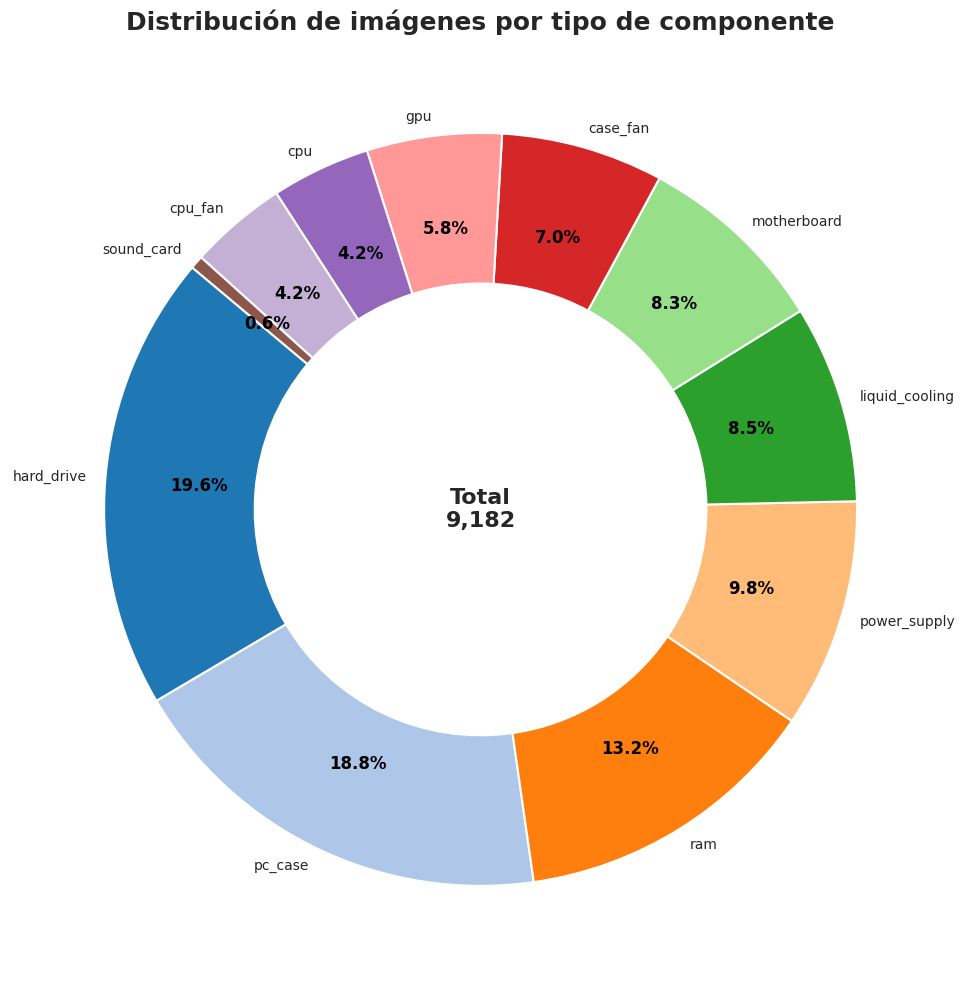

In [47]:
labels = label_counts["label"]
sizes = label_counts["count"]
total_images = sizes.sum()

colors = plt.cm.tab20.colors[:len(labels)]

plt.figure(figsize=(10,10))

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops={"width":0.4, "edgecolor":"white", "linewidth":1.5},
    pctdistance=0.75,
    labeldistance=1.05
)

for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(12)
    autotext.set_weight("bold")

plt.text(0, 0, f"Total\n{total_images:,}", ha="center", va="center", fontsize=16, weight="bold")

plt.gca().set_aspect("equal")
plt.title("Distribución de imágenes por tipo de componente", fontsize=18, weight="bold")
plt.tight_layout()
plt.show()

## Conclusiones

Hemos preparado un dataset que contiene **la etiqueta (`label`)** de cada componente y la **URL de su imagen**.

En un **siguiente cuaderno**, descargaremos todas las imágenes localmente y las organizaremos por etiqueta, lo que permitirá **entrenar el modelo de manera más rápida y eficiente** sin depender de las descargas durante el entrenamiento.
